In [12]:
import tensorflow
import matplotlib.pyplot as plt

In [13]:
model = tensorflow.keras.models.load_model('D:/projects/proje/modeller/Model5.h5')

model.compile(loss='binary_crossentropy',
              optimizer=tensorflow.keras.optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

egitim_yolu = 'D:/projects/proje/dataSet/Train'
dogrulama_yolu = 'D:/projects/proje/dataSet/Validation'
test_yolu = 'D:/projects/proje/dataSet/Test'

train_datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(
      rescale=1./255, # piksel değerleri 0-255'den 0-1 arasına getiriliyor.
      rotation_range=40, # istenilen artırma işlemleri yapılabilir.
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip = False, #burası önemli, aynalama denebilir.
      fill_mode='nearest'
      )

train_generator = train_datagen.flow_from_directory(
        egitim_yolu,
        target_size=(224, 224),
        batch_size=16,
        )

# To validate the training process, we do not need augmented images.
validation_datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255
        )

validation_generator = validation_datagen.flow_from_directory(
        dogrulama_yolu,
        target_size=(224, 224),
        batch_size=16,
        )

Found 1151 images belonging to 4 classes.
Found 92 images belonging to 4 classes.


In [14]:
class MyThresholdCallback(tensorflow.keras.callbacks.Callback):
    def __init__(self, acc_limit,val_limit):
        super(MyThresholdCallback, self).__init__()
        self.acc_limit = acc_limit
        self.val_limit = val_limit
    def on_epoch_end(self, epoch, logs=None): 
        acc = logs["acc"]
        val_acc = logs["val_acc"]
        if val_acc >= self.val_limit :
            if acc >= self.acc_limit :
                self.model.stop_training = True

callbacks = MyThresholdCallback(acc_limit=0.99, val_limit=0.99)

In [15]:
history = model.fit( #eğitim takibi
      train_generator,
      steps_per_epoch=15,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=1,
      callbacks=[callbacks]
      )

Epoch 1/100
15/15 [==============================] - 57s 4s/step - loss: 0.0575 - acc: 0.9665 - val_loss: 0.2614 - val_acc: 0.7500
Epoch 2/100
15/15 [==============================] - 60s 4s/step - loss: 0.0586 - acc: 0.9792 - val_loss: 0.3474 - val_acc: 0.7500
Epoch 3/100
15/15 [==============================] - 61s 4s/step - loss: 0.0646 - acc: 0.9542 - val_loss: 0.2169 - val_acc: 0.8125
Epoch 4/100
15/15 [==============================] - 60s 4s/step - loss: 0.0718 - acc: 0.9625 - val_loss: 0.2411 - val_acc: 0.7500
Epoch 5/100
15/15 [==============================] - 60s 4s/step - loss: 0.0638 - acc: 0.9582 - val_loss: 0.2918 - val_acc: 0.7500
Epoch 6/100
15/15 [==============================] - 60s 4s/step - loss: 0.0785 - acc: 0.9625 - val_loss: 0.3282 - val_acc: 0.8125
Epoch 7/100
15/15 [==============================] - 59s 4s/step - loss: 0.0660 - acc: 0.9708 - val_loss: 0.5093 - val_acc: 0.5625
Epoch 8/100
15/15 [==============================] - 59s 4s/step - loss: 0.0669 - a

In [16]:
model.save('D:/projects/proje/modeller/uzerineModel5.h5')

test_datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255
        )

test_generator = test_datagen.flow_from_directory(
       test_yolu,
        target_size=(224, 224),
        batch_size=20,
        )

Found 290 images belonging to 4 classes.


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


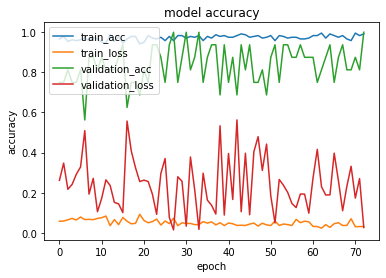

C:\Users\SAHILR~1\AppData\Local\Temp/ipykernel_18404/1567553234.py:14: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)


test acc: 0.8586207032203674


In [17]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'train_loss', 'validation_acc', 'validation_loss'], loc='upper left')
plt.show()

# Printing the test results.
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)